# Solid-Spoon

**Author:** Crissy Bruce
***

## Business Problem

Spoonacular has hired me to build a model to use for customers who want to estimate the price per serving based on ingredients.  There is a demand for this estimate as users often have a budget and need a way to gauge the cost of a meal.  The system asks users to input the ingredients they have on hand or plan to use and returns an estimated price per serving.  

That data used to develop the model is sourced from Spoonacular.com via API for 1000 different recipes.  A link to the Spoonacular API can be found in the Readme file.

## Data Understanding

The data used for this project provides detailed recipe information including ingredients needed, pricePerServing, diet type, nutrition, cuisine type and more.  I selected Spoonacular to create my model because of the wealth of data available for each recipe so that I can use in future work.

The target variable for this project is pricePerServing.  To predict the target variable, I used Natural Language processing to vectorize the ingredients in order to test different models. The goal is to select the best model to predict the price per serving based on input of ingredients from the user.

### Data Cleaning

In [1]:
# Import standard packages
import requests
import config
import json
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np
np.random.seed(0)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import ast



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data=pd.read_csv(r'C:\Users\owner\Documents\Flatiron\solid-spoon\solid-spoon\data1.csv')

In [3]:
data.head()

,Unnamed: 0,vegetarian,vegan,glutenFree,dairyFree,veryHealthy,cheap,veryPopular,sustainable,weightWatcherSmartPoints,...,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,likes,usedIngredients,unusedIngredients,preparationMinutes,cookingMinutes,author
0,0,True,True,True,True,True,False,True,False,4,...,https://spoonacular.com/cauliflower-brown-rice...,0,9,"[{'id': 11090, 'amount': 2.0, 'unit': 'cups', ...",0,[],[],NaN,NaN,NaN
1,1,True,True,False,True,True,False,True,False,19,...,https://spoonacular.com/homemade-garlic-and-ba...,0,2,"[{'id': 2044, 'amount': 0.25, 'unit': 'cup', '...",0,[],[],NaN,NaN,NaN
2,2,True,False,False,False,True,False,True,False,15,...,https://spoonacular.com/berry-banana-breakfast...,0,5,"[{'id': 9040, 'amount': 0.25, 'unit': 'cup', '...",0,[],[],5.0,0.0,NaN
3,3,True,True,True,True,True,False,False,False,5,...,https://spoonacular.com/garlicky-kale-644387,0,3,"[{'id': 2069, 'amount': 3.0, 'unit': 'tablespo...",0,[],[],NaN,NaN,NaN
4,4,False,False,True,True,True,False,True,False,10,...,https://spoonacular.com/chicken-tortilla-soup-...,0,9,"[{'id': 16018, 'amount': 15.0, 'unit': 'oz', '...",0,[],[],NaN,NaN,NaN


In [4]:
#Reviewing the items in the extendedIngredients column
data['extendedIngredients']

0       [{'id': 11090, 'aisle': 'Produce', 'image': 'b...
1       [{'id': 2044, 'aisle': 'Produce;Spices and Sea...
2       [{'id': 9040, 'aisle': 'Produce', 'image': 'ba...
3       [{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...
4       [{'id': 16018, 'aisle': 'Canned and Jarred', '...
                              ...                        
1595    [{'id': 10111352, 'aisle': 'Frozen', 'image': ...
1596    [{'id': 1053, 'aisle': 'Milk, Eggs, Other Dair...
1597    [{'id': 2044, 'aisle': 'Produce;Spices and Sea...
1598    [{'id': 10123, 'aisle': 'Meat', 'image': 'raw-...
1599    [{'id': 20012, 'aisle': 'Pasta and Rice;Ethnic...
Name: extendedIngredients, Length: 1600, dtype: object

In [5]:
#check for duplicates
data.duplicated(subset=['id'])

0       False
1       False
2       False
3       False
4       False
        ...  
1595     True
1596     True
1597     True
1598     True
1599     True
Length: 1600, dtype: bool

In [6]:
#dropped duplicate ids from the dataset
data=data.drop_duplicates(subset=['id'])

## Data Preparation

In [7]:
#Looking at the length of clean data
data.shape

(1000, 44)

In [8]:
data.head()

,Unnamed: 0,vegetarian,vegan,glutenFree,dairyFree,veryHealthy,cheap,veryPopular,sustainable,weightWatcherSmartPoints,...,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,likes,usedIngredients,unusedIngredients,preparationMinutes,cookingMinutes,author
0,0,True,True,True,True,True,False,True,False,4,...,https://spoonacular.com/cauliflower-brown-rice...,0,9,"[{'id': 11090, 'amount': 2.0, 'unit': 'cups', ...",0,[],[],NaN,NaN,NaN
1,1,True,True,False,True,True,False,True,False,19,...,https://spoonacular.com/homemade-garlic-and-ba...,0,2,"[{'id': 2044, 'amount': 0.25, 'unit': 'cup', '...",0,[],[],NaN,NaN,NaN
2,2,True,False,False,False,True,False,True,False,15,...,https://spoonacular.com/berry-banana-breakfast...,0,5,"[{'id': 9040, 'amount': 0.25, 'unit': 'cup', '...",0,[],[],5.0,0.0,NaN
3,3,True,True,True,True,True,False,False,False,5,...,https://spoonacular.com/garlicky-kale-644387,0,3,"[{'id': 2069, 'amount': 3.0, 'unit': 'tablespo...",0,[],[],NaN,NaN,NaN
4,4,False,False,True,True,True,False,True,False,10,...,https://spoonacular.com/chicken-tortilla-soup-...,0,9,"[{'id': 16018, 'amount': 15.0, 'unit': 'oz', '...",0,[],[],NaN,NaN,NaN


In [9]:
#Looking at a list of all the columns to decide on what to drop
list(data.columns)

['Unnamed: 0',
 'vegetarian',
 'vegan',
 'glutenFree',
 'dairyFree',
 'veryHealthy',
 'cheap',
 'veryPopular',
 'sustainable',
 'weightWatcherSmartPoints',
 'gaps',
 'lowFodmap',
 'aggregateLikes',
 'spoonacularScore',
 'healthScore',
 'creditsText',
 'license',
 'sourceName',
 'pricePerServing',
 'extendedIngredients',
 'id',
 'title',
 'readyInMinutes',
 'servings',
 'sourceUrl',
 'image',
 'imageType',
 'nutrition',
 'summary',
 'cuisines',
 'dishTypes',
 'diets',
 'occasions',
 'analyzedInstructions',
 'spoonacularSourceUrl',
 'usedIngredientCount',
 'missedIngredientCount',
 'missedIngredients',
 'likes',
 'usedIngredients',
 'unusedIngredients',
 'preparationMinutes',
 'cookingMinutes',
 'author']

In [10]:
#Dropping data that will not be used.
data=data.drop(columns=['Unnamed: 0',
 'vegetarian',
 'vegan',
 'glutenFree',
 'dairyFree',
 'veryHealthy',
 'cheap',
 'veryPopular',
 'sustainable',
 'weightWatcherSmartPoints',
 'gaps',
 'lowFodmap',
 'creditsText',
 'license',
 'sourceName',
 'readyInMinutes',
 'image',
 'imageType',
 'summary',
 'cuisines',
 'occasions',
 'analyzedInstructions',
 'likes',
 'preparationMinutes',
 'cookingMinutes',
 'author'])

In [11]:
#confirming that df no longer includes the dropped columns
data

,aggregateLikes,spoonacularScore,healthScore,pricePerServing,extendedIngredients,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,usedIngredients,unusedIngredients
0,3689,99.0,76.0,112.39,"[{'id': 11090, 'aisle': 'Produce', 'image': 'b...",716426,"Cauliflower, Brown Rice, and Vegetable Fried Rice",8,http://fullbellysisters.blogspot.com/2012/01/c...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/cauliflower-brown-rice...,0,9,"[{'id': 11090, 'amount': 2.0, 'unit': 'cups', ...",[],[]
1,1669,99.0,78.0,83.23,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",715594,Homemade Garlic and Basil French Fries,2,http://www.pinkwhen.com/homemade-french-fries/,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['dairy free', 'lacto ovo vegetarian', 'vegan']",https://spoonacular.com/homemade-garlic-and-ba...,0,2,"[{'id': 2044, 'amount': 0.25, 'unit': 'cup', '...",[],[]
2,689,99.0,63.0,204.29,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...",715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,"[{'id': 9040, 'amount': 0.25, 'unit': 'cup', '...",[],[]
3,19,99.0,93.0,69.09,"[{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...",644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,"[{'id': 2069, 'amount': 3.0, 'unit': 'tablespo...",[],[]
4,1429,99.0,73.0,339.33,"[{'id': 16018, 'aisle': 'Canned and Jarred', '...",715392,Chicken Tortilla Soup (Slow Cooker),2,http://www.pinkwhen.com/chicken-tortilla-soup-...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free']",https://spoonacular.com/chicken-tortilla-soup-...,0,9,"[{'id': 16018, 'amount': 15.0, 'unit': 'oz', '...",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,76.0,24.0,111.22,"[{'id': 10111352, 'aisle': 'Frozen', 'image': ...",660322,Smashed Fried Lemon Potatoes,4,http://www.foodista.com/recipe/38DN2VQF/smashe...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/smashed-fried-lemon-po...,0,8,"[{'id': 10111352, 'amount': 1.5, 'unit': 'poun...",[],[]
996,0,76.0,46.0,595.06,"[{'id': 1053, 'aisle': 'Milk, Eggs, Other Dair...",157081,Omega-3 Creamy Leek Soup,2,http://spoonacular.com/-1381436006147,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'primal', 'pescatarian']",https://spoonacular.com/omega-3-creamy-leek-so...,0,8,"[{'id': 1053, 'amount': 250.0, 'unit': 'ml', '...",[],[]
997,1,76.0,36.0,242.59,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",661351,Spinach Soup With Wontons,4,http://www.foodista.com/recipe/VPKSZHYP/spinac...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],[],https://spoonacular.com/spinach-soup-with-wont...,0,8,"[{'id': 2044, 'amount': 1.0, 'unit': 'teaspoon...",[],[]
998,1,76.0,37.0,363.42,"[{'id': 10123, 'aisle': 'Meat', 'image': 'raw-...",658529,"Roasted Butternut Squash, Pecan, Bacon, Mix Gr...",4,http://www.foodista.com/recipe/67XP25KK/roaste...,"{'nutrients': [{'name': 'Calories', 'title': '...",['salad'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/roasted-butternut-squa...,0,8,"[{'id': 10123, 'amount': 5.0, 'unit': 'slices'...",[],[]


In [12]:
#Checking for null values in the data
data.isnull().sum().sum()

0

## EDA
Time to explore the data to better understand the dataset.

In [13]:
#rearranging columns 
data = data[['id', 'title', 'servings', 'sourceUrl', 'nutrition', 'dishTypes', 'diets', 'spoonacularSourceUrl', 'usedIngredientCount','missedIngredientCount','missedIngredients', 'usedIngredients', 'unusedIngredients', 'aggregateLikes','spoonacularScore', 'healthScore', 'extendedIngredients', 'pricePerServing']]

In [14]:
data

,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,usedIngredients,unusedIngredients,aggregateLikes,spoonacularScore,healthScore,extendedIngredients,pricePerServing
0,716426,"Cauliflower, Brown Rice, and Vegetable Fried Rice",8,http://fullbellysisters.blogspot.com/2012/01/c...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/cauliflower-brown-rice...,0,9,"[{'id': 11090, 'amount': 2.0, 'unit': 'cups', ...",[],[],3689,99.0,76.0,"[{'id': 11090, 'aisle': 'Produce', 'image': 'b...",112.39
1,715594,Homemade Garlic and Basil French Fries,2,http://www.pinkwhen.com/homemade-french-fries/,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['dairy free', 'lacto ovo vegetarian', 'vegan']",https://spoonacular.com/homemade-garlic-and-ba...,0,2,"[{'id': 2044, 'amount': 0.25, 'unit': 'cup', '...",[],[],1669,99.0,78.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",83.23
2,715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,"[{'id': 9040, 'amount': 0.25, 'unit': 'cup', '...",[],[],689,99.0,63.0,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...",204.29
3,644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,"[{'id': 2069, 'amount': 3.0, 'unit': 'tablespo...",[],[],19,99.0,93.0,"[{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...",69.09
4,715392,Chicken Tortilla Soup (Slow Cooker),2,http://www.pinkwhen.com/chicken-tortilla-soup-...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free']",https://spoonacular.com/chicken-tortilla-soup-...,0,9,"[{'id': 16018, 'amount': 15.0, 'unit': 'oz', '...",[],[],1429,99.0,73.0,"[{'id': 16018, 'aisle': 'Canned and Jarred', '...",339.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,660322,Smashed Fried Lemon Potatoes,4,http://www.foodista.com/recipe/38DN2VQF/smashe...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/smashed-fried-lemon-po...,0,8,"[{'id': 10111352, 'amount': 1.5, 'unit': 'poun...",[],[],6,76.0,24.0,"[{'id': 10111352, 'aisle': 'Frozen', 'image': ...",111.22
996,157081,Omega-3 Creamy Leek Soup,2,http://spoonacular.com/-1381436006147,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'primal', 'pescatarian']",https://spoonacular.com/omega-3-creamy-leek-so...,0,8,"[{'id': 1053, 'amount': 250.0, 'unit': 'ml', '...",[],[],0,76.0,46.0,"[{'id': 1053, 'aisle': 'Milk, Eggs, Other Dair...",595.06
997,661351,Spinach Soup With Wontons,4,http://www.foodista.com/recipe/VPKSZHYP/spinac...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],[],https://spoonacular.com/spinach-soup-with-wont...,0,8,"[{'id': 2044, 'amount': 1.0, 'unit': 'teaspoon...",[],[],1,76.0,36.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",242.59
998,658529,"Roasted Butternut Squash, Pecan, Bacon, Mix Gr...",4,http://www.foodista.com/recipe/67XP25KK/roaste...,"{'nutrients': [{'name': 'Calories', 'title': '...",['salad'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/roasted-butternut-squa...,0,8,"[{'id': 10123, 'amount': 5.0, 'unit': 'slices'...",[],[],1,76.0,37.0,"[{'id': 10123, 'aisle': 'Meat', 'image': 'raw-...",363.42


In [15]:
#reviewing the column that will be my target variable
data['pricePerServing']

0      112.39
1       83.23
2      204.29
3       69.09
4      339.33
        ...  
995    111.22
996    595.06
997    242.59
998    363.42
999     23.36
Name: pricePerServing, Length: 1000, dtype: float64

In [16]:
#I need to pull the details from the extendedIngredients column so that there is a single column for list of ingredient in order to use the ingredient data in my model
data['extendedIngredients']

0      [{'id': 11090, 'aisle': 'Produce', 'image': 'b...
1      [{'id': 2044, 'aisle': 'Produce;Spices and Sea...
2      [{'id': 9040, 'aisle': 'Produce', 'image': 'ba...
3      [{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...
4      [{'id': 16018, 'aisle': 'Canned and Jarred', '...
                             ...                        
995    [{'id': 10111352, 'aisle': 'Frozen', 'image': ...
996    [{'id': 1053, 'aisle': 'Milk, Eggs, Other Dair...
997    [{'id': 2044, 'aisle': 'Produce;Spices and Sea...
998    [{'id': 10123, 'aisle': 'Meat', 'image': 'raw-...
999    [{'id': 20012, 'aisle': 'Pasta and Rice;Ethnic...
Name: extendedIngredients, Length: 1000, dtype: object

In [17]:
#accessing the first row of the extendedIngredients data
first=data['extendedIngredients'].iloc[0]

In [18]:
#Viewing the first row of extendedIngredients data
len(first)

6985

In [19]:
type(data['extendedIngredients'])

pandas.core.series.Series

In [20]:
data['title']

0      Cauliflower, Brown Rice, and Vegetable Fried Rice
1                 Homemade Garlic and Basil French Fries
2                        Berry Banana Breakfast Smoothie
3                                          Garlicky Kale
4                    Chicken Tortilla Soup (Slow Cooker)
                             ...                        
995                         Smashed Fried Lemon Potatoes
996                             Omega-3 Creamy Leek Soup
997                            Spinach Soup With Wontons
998    Roasted Butternut Squash, Pecan, Bacon, Mix Gr...
999            Spinach, Sultana and Bulgur Wheat Borek's
Name: title, Length: 1000, dtype: object

In [21]:
def ingnames(text):
    '''Takes in ingredient text for a recipe. Returns 'nameClean' list of ingredients joined by commas.'''
    ingnames=[]
    ingredientsnamelist=ast.literal_eval(text)
    for item in ingredientsnamelist:
        ingnames.append(item['nameClean'])
        #print(item['nameClean'])
    if ingnames:
        return ','.join([i for i in ingnames if i])
    return ' '

In [22]:
#Reviewing the output of the ingnames function
ingnames(first)

'broccoli,cauliflower,coconut oil,cooked brown rice,garlic,grape seed oil,lower sodium soy sauce,green peas,salt,spring onions,spring onions,sesame oil,sesame seeds'

In [23]:
#creating lambda function that stores all the ingredient names as a data point
data['ingredname'] = data['extendedIngredients'].map(ingnames)

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
data['ingredname']

0      broccoli,cauliflower,coconut oil,cooked brown ...
1      basil,wheat flour,garlic powder,garlic salt,ve...
2      banana,graham cracker crumbs,soymilk,strawberr...
3                 balsamic vinegar,garlic,kale,olive oil
4      canned black beans,canned green chiles,canned ...
                             ...                        
995    fingerling potato,parsley,fresh rosemary,thyme...
996    cream,dill,lemon juice,leek,green peas,salmon,...
997    basil,chicken broth,chili sauce,frozen spinach...
998    bacon,ground black pepper,butternut squash,sto...
999    bulgur,wheat flour,olive oil,salt,salt and pep...
Name: ingredname, Length: 1000, dtype: object

In [25]:
#dropping data with null values
data[data['ingredname'].isna()]
data.dropna(inplace=True)

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
data.head()

,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,usedIngredients,unusedIngredients,aggregateLikes,spoonacularScore,healthScore,extendedIngredients,pricePerServing,ingredname
0,716426,"Cauliflower, Brown Rice, and Vegetable Fried Rice",8,http://fullbellysisters.blogspot.com/2012/01/c...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/cauliflower-brown-rice...,0,9,"[{'id': 11090, 'amount': 2.0, 'unit': 'cups', ...",[],[],3689,99.0,76.0,"[{'id': 11090, 'aisle': 'Produce', 'image': 'b...",112.39,"broccoli,cauliflower,coconut oil,cooked brown ..."
1,715594,Homemade Garlic and Basil French Fries,2,http://www.pinkwhen.com/homemade-french-fries/,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['dairy free', 'lacto ovo vegetarian', 'vegan']",https://spoonacular.com/homemade-garlic-and-ba...,0,2,"[{'id': 2044, 'amount': 0.25, 'unit': 'cup', '...",[],[],1669,99.0,78.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",83.23,"basil,wheat flour,garlic powder,garlic salt,ve..."
2,715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,"[{'id': 9040, 'amount': 0.25, 'unit': 'cup', '...",[],[],689,99.0,63.0,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...",204.29,"banana,graham cracker crumbs,soymilk,strawberr..."
3,644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,"[{'id': 2069, 'amount': 3.0, 'unit': 'tablespo...",[],[],19,99.0,93.0,"[{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...",69.09,"balsamic vinegar,garlic,kale,olive oil"
4,715392,Chicken Tortilla Soup (Slow Cooker),2,http://www.pinkwhen.com/chicken-tortilla-soup-...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free']",https://spoonacular.com/chicken-tortilla-soup-...,0,9,"[{'id': 16018, 'amount': 15.0, 'unit': 'oz', '...",[],[],1429,99.0,73.0,"[{'id': 16018, 'aisle': 'Canned and Jarred', '...",339.33,"canned black beans,canned green chiles,canned ..."


In [27]:
#Checking out the list of ingredients for the first recipe
data['ingredname'].iloc[629]

'cabbage,red cabbage,carrot,black sesame seeds,yellow onion,olive oil,lemon juice,agave,tahini,water,salt'

In [28]:
data.shape

(1000, 19)

In [29]:
#Obtaining a list of all ingredients in the 'ingredname' column, update can take another iterable and add to set
total_ingreds = set()
for comment in data['ingredname']:
    total_ingreds.update(comment.split(','))
len(total_ingreds)

1063

In [30]:
print(total_ingreds)

{'elk tenderloin', 'peperoncini', 'delicata squash', 'okra', 'cheese', 'quick cooking tapioca', 'chocolate', 'turkey bacon', 'tea', 'spaghetti', 'couscous', 'extra virgin olive oil', 'basmati rice', 'fresh mint', 'arugula', 'meatballs', 'light olive oil', 'cream', 'sweet potato vermicelli', 'ready to serve asian fried rice', 'goat cheese', 'thick cut bacon', 'boston butt', 'garlic paste', 'monterey jack cheese', 'evaporated milk', 'cooked crabmeat', 'cooked chicken breast', 'grilling cheese', 'sweet yellow onion', 'spinach', 'pico de gallo', '95 percent lean ground beef', 'vanilla extract', 'clementine', 'extra firm tofu', 'xylitol', 'dungeness crab', 'cognac', 'edamame', 'tomato paste', 'carrot', 'canned sardines', 'tomato sauce', 'anchovy paste', 'kabocha squash', 'whole coriander seeds', 'dehydrated garlic', 'creamy peanut butter', 'food color', 'soba noodles', 'flank steak', 'curry paste', 'chili garlic sauce', 'dried kidney beans', 'amchoor', 'belgian endive', 'grape tomato', 'arb

In [31]:
#transformed all words in the ingredients to lower case
total_ingreds = [word.lower() for word in total_ingreds]

In [32]:
#exploring the data with frequency distributions
ingreds_concat=[]
for ingreds in data['ingredname']:
    ingreds_concat +=ingreds.split(',')

In [33]:
ingreds_freqdist = FreqDist(ingreds_concat)
topfreqdist=ingreds_freqdist.most_common(20)
topfreqdist

[('garlic', 511),
 ('olive oil', 434),
 ('salt', 345),
 ('onion', 295),
 ('salt and pepper', 233),
 ('ground black pepper', 227),
 ('water', 195),
 ('parsley', 174),
 ('lemon juice', 165),
 ('carrot', 163),
 ('bell pepper', 157),
 ('tomato', 129),
 ('spring onions', 128),
 ('fresh cilantro', 114),
 ('cumin', 106),
 ('red pepper', 103),
 ('red onion', 102),
 ('parmesan', 90),
 ('ginger', 89),
 ('extra virgin olive oil', 89)]

In [34]:
#conversion to Pandas series via Python dictionary for easier plotting
topfreqdistpd = pd.Series(dict(topfreqdist))
topfreqdistpd

garlic                    511
olive oil                 434
salt                      345
onion                     295
salt and pepper           233
ground black pepper       227
water                     195
parsley                   174
lemon juice               165
carrot                    163
bell pepper               157
tomato                    129
spring onions             128
fresh cilantro            114
cumin                     106
red pepper                103
red onion                 102
parmesan                   90
ginger                     89
extra virgin olive oil     89
dtype: int64

In [35]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

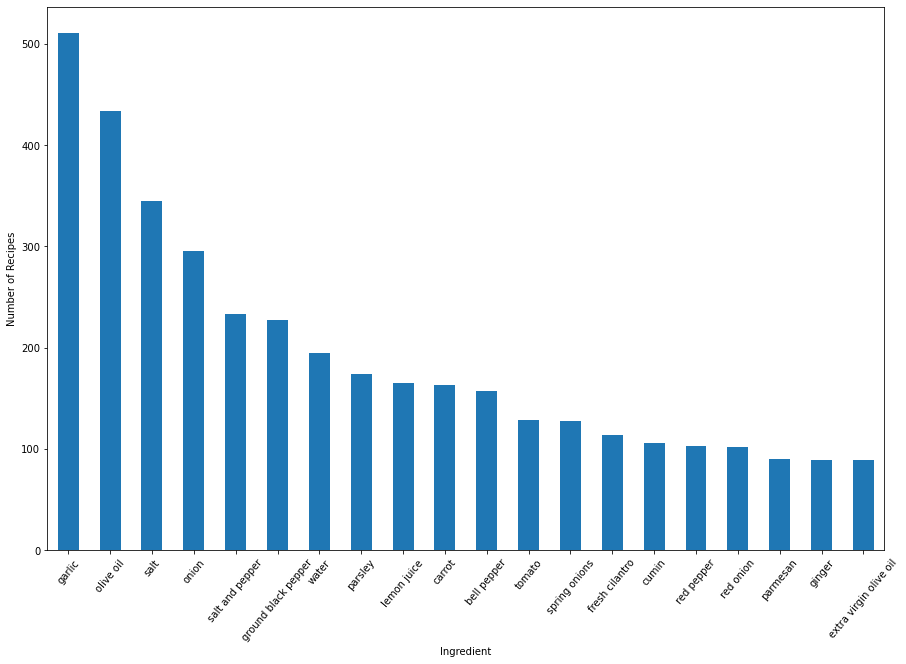

In [36]:
#Distribution Frequency Bar Graph
plt.figure(figsize=(15,10))
topfreqdistpd.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Ingredient")
plt.ylabel("Number of Recipes")
plt.show()

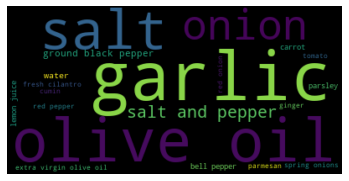

In [37]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=topfreqdistpd)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

array([[<AxesSubplot:title={'center':'pricePerServing'}>]], dtype=object)

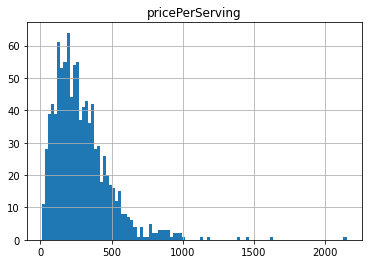

In [38]:
#checking the distribution of the pricePerServing data
data.hist('pricePerServing', bins=100)

In [39]:
#checking to see which recipes are less than $.02 per serving
print(data.loc[data['pricePerServing']<=20])

         id                                     title  servings  \
286  648729                       Kale With Red Onion         8   
576  775585                  Crockpot "Refried" Beans        16   
832  655477  Peas And Tarragon With Fresh Goat Cheese        10   

                                             sourceUrl  \
286  https://www.foodista.com/recipe/XM62FP2Y/kale-...   
576  http://penniesandpancakes.blogspot.com/2012/09...   
832  https://www.foodista.com/recipe/SNJ64XV8/peas-...   

                                             nutrition  \
286  {'nutrients': [{'name': 'Calories', 'title': '...   
576  {'nutrients': [{'name': 'Calories', 'title': '...   
832  {'nutrients': [{'name': 'Calories', 'title': '...   

                                             dishTypes  \
286                                      ['side dish']   
576  ['antipasti', 'starter', 'snack', 'appetizer',...   
832                                      ['side dish']   

                                

In [40]:
pricePerServing_mean = data[['pricePerServing']].mean()
pricePerServing_mean

pricePerServing    293.59977
dtype: float64

In [41]:
pricePerServing_std = data[['pricePerServing']].std()
pricePerServing_std

pricePerServing    204.256198
dtype: float64

#### Prepping for Train Test Split

In [42]:
#creating a copy of the data to use for modeling
data2 = data.copy()
data2

,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,usedIngredients,unusedIngredients,aggregateLikes,spoonacularScore,healthScore,extendedIngredients,pricePerServing,ingredname
0,716426,"Cauliflower, Brown Rice, and Vegetable Fried Rice",8,http://fullbellysisters.blogspot.com/2012/01/c...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/cauliflower-brown-rice...,0,9,"[{'id': 11090, 'amount': 2.0, 'unit': 'cups', ...",[],[],3689,99.0,76.0,"[{'id': 11090, 'aisle': 'Produce', 'image': 'b...",112.39,"broccoli,cauliflower,coconut oil,cooked brown ..."
1,715594,Homemade Garlic and Basil French Fries,2,http://www.pinkwhen.com/homemade-french-fries/,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['dairy free', 'lacto ovo vegetarian', 'vegan']",https://spoonacular.com/homemade-garlic-and-ba...,0,2,"[{'id': 2044, 'amount': 0.25, 'unit': 'cup', '...",[],[],1669,99.0,78.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",83.23,"basil,wheat flour,garlic powder,garlic salt,ve..."
2,715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,"[{'id': 9040, 'amount': 0.25, 'unit': 'cup', '...",[],[],689,99.0,63.0,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...",204.29,"banana,graham cracker crumbs,soymilk,strawberr..."
3,644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,"[{'id': 2069, 'amount': 3.0, 'unit': 'tablespo...",[],[],19,99.0,93.0,"[{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...",69.09,"balsamic vinegar,garlic,kale,olive oil"
4,715392,Chicken Tortilla Soup (Slow Cooker),2,http://www.pinkwhen.com/chicken-tortilla-soup-...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free']",https://spoonacular.com/chicken-tortilla-soup-...,0,9,"[{'id': 16018, 'amount': 15.0, 'unit': 'oz', '...",[],[],1429,99.0,73.0,"[{'id': 16018, 'aisle': 'Canned and Jarred', '...",339.33,"canned black beans,canned green chiles,canned ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,660322,Smashed Fried Lemon Potatoes,4,http://www.foodista.com/recipe/38DN2VQF/smashe...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/smashed-fried-lemon-po...,0,8,"[{'id': 10111352, 'amount': 1.5, 'unit': 'poun...",[],[],6,76.0,24.0,"[{'id': 10111352, 'aisle': 'Frozen', 'image': ...",111.22,"fingerling potato,parsley,fresh rosemary,thyme..."
996,157081,Omega-3 Creamy Leek Soup,2,http://spoonacular.com/-1381436006147,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'primal', 'pescatarian']",https://spoonacular.com/omega-3-creamy-leek-so...,0,8,"[{'id': 1053, 'amount': 250.0, 'unit': 'ml', '...",[],[],0,76.0,46.0,"[{'id': 1053, 'aisle': 'Milk, Eggs, Other Dair...",595.06,"cream,dill,lemon juice,leek,green peas,salmon,..."
997,661351,Spinach Soup With Wontons,4,http://www.foodista.com/recipe/VPKSZHYP/spinac...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],[],https://spoonacular.com/spinach-soup-with-wont...,0,8,"[{'id': 2044, 'amount': 1.0, 'unit': 'teaspoon...",[],[],1,76.0,36.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",242.59,"basil,chicken broth,chili sauce,frozen spinach..."
998,658529,"Roasted Butternut Squash, Pecan, Bacon, Mix Gr...",4,http://www.foodista.com/recipe/67XP25KK/roaste...,"{'nutrients': [{'name': 'Calories', 'title': '...",

In [43]:
y = data2[['pricePerServing']].copy()
X = data2[['ingredname']].copy()

In [44]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33, random_state=42) 

In [45]:
#reviewing the shapes post train test split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(670, 1) (330, 1) (670, 1) (330, 1)


In [46]:
X_train_ingred=X_train['ingredname']

In [47]:
#Taking a peek at the training data
X_train_ingred

703    bacon,olive oil,beef cubes,garlic,onion,thyme,...
311    ground black pepper,dill,garlic,lemon juice,le...
722    olive oil,garlic,onion,carrot,water,long grain...
629    cabbage,red cabbage,carrot,black sesame seeds,...
0      broccoli,cauliflower,coconut oil,cooked brown ...
                             ...                        
106    brown rice flour,golden brown sugar,carrot,gro...
270    chickpeas,orange pepper,olive oil spray,olive ...
860    butter,corn starch,dried apricots,dried sweete...
435    balsamic vinegar,thyme,garlic,ground black pep...
102    chicken stock,ice,mango,rice,root vegetable,sc...
Name: ingredname, Length: 670, dtype: object

In [48]:
#looking at the y train data
y_train

,pricePerServing
703,450.20
311,420.24
722,204.92
629,86.46
0,112.39
...,...
106,319.19
270,158.68
860,429.08
435,289.45


In [49]:
#confirming the data type of X train to prep for frequency distributions
for x in X_train:
    print(x)
    print(type(x))
    break

ingredname
<class 'str'>


In [50]:
type(X_train)

pandas.core.frame.DataFrame

In [51]:
#exploring the X train data with frequency distributions
ingreds_concat_X_train=[]
for ingreds in X_train['ingredname']:
    ingreds_concat_X_train +=ingreds.split(',')

In [52]:
ingreds_freqdist_Xtrain = FreqDist(ingreds_concat_X_train)
ingreds_freqdist_Xtrain.most_common()

[('garlic', 334),
 ('olive oil', 291),
 ('salt', 254),
 ('onion', 201),
 ('ground black pepper', 163),
 ('salt and pepper', 150),
 ('water', 139),
 ('parsley', 115),
 ('lemon juice', 111),
 ('bell pepper', 106),
 ('carrot', 104),
 ('tomato', 89),
 ('spring onions', 87),
 ('red pepper', 75),
 ('fresh cilantro', 74),
 ('cumin', 72),
 ('red onion', 70),
 ('ginger', 62),
 ('extra virgin olive oil', 59),
 ('wheat flour', 57),
 ('parmesan', 56),
 ('red pepper flakes', 52),
 ('lime juice', 52),
 ('hass avocado', 52),
 ('basil', 52),
 ('sea salt', 47),
 ('egg', 46),
 ('oregano', 46),
 ('vegetable oil', 46),
 ('honey', 46),
 ('mushrooms', 44),
 ('spinach', 44),
 ('butter', 43),
 ('zucchini', 43),
 ('coarse kosher salt', 43),
 ('bay leaves', 42),
 ('sugar', 42),
 ('thyme', 40),
 ('ground cayenne pepper', 40),
 ('boneless chicken breast', 40),
 ('soy sauce', 40),
 ('canned tomatoes', 39),
 ('chili powder', 37),
 ('garlic powder', 36),
 ('salmon', 34),
 ('cooking oil', 34),
 ('chicken broth', 34),

There are some ingredients that appear in over 100 recipes.  TFIDF will likely give very little weight to those ingredients as they are not significant in distinguishing recipes with a higher pricePerServing.

#### Time to vectorize our text data to prep for modeling

In [53]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(','), lowercase=False)

X_train_vectorized = vectorizer.fit_transform(X_train['ingredname']).toarray()
X_test_vectorized = vectorizer.transform(X_test['ingredname']).toarray()

X_train_vectorized.shape, X_test_vectorized.shape

((670, 908), (330, 908))

In [54]:
#Checking out a few rows of the vectorized data
X_train_vectorized[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### TFIDF 

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(','), lowercase=False)

X_train_tfidf = tfidf.fit_transform(X_train['ingredname']).toarray()
X_test_tfidf = tfidf.transform(X_test['ingredname']).toarray()

X_train_tfidf.shape, X_test_tfidf.shape

((670, 908), (330, 908))

In [57]:
feature_tokens = tfidf.get_feature_names()
feature_tokens

['1 percent milk',
 '2 percent milk',
 '95 percent lean ground beef',
 'acorn squash',
 'adobo sauce',
 'agave',
 'ahi tuna steak',
 'allspice',
 'almond butter',
 'almond milk',
 'almonds',
 'amaranth',
 'amchar masala',
 'amchoor',
 'anaheim pepper',
 'ancho chili pepper',
 'ancho chili powder',
 'anchovies',
 'anchovies in extra virgin olive oil',
 'andouille sausage',
 'angel hair pasta',
 'apple',
 'apple cider vinegar',
 'apple juice',
 'apricot',
 'arbol chile',
 'arborrio rice',
 'arrowroot',
 'artichoke',
 'arugula',
 'asafoetida',
 'asparagus',
 'avocado oil',
 'baby back ribs',
 'baby beets',
 'baby bok choy',
 'baby carrots',
 'baby corn',
 'baby eggplant',
 'baby spinach',
 'bacon',
 'bacon bits',
 'bacon drippings',
 'baguette',
 'baking mix',
 'baking soda',
 'balsamic vinegar',
 'banana',
 'banana leaves',
 'banana shallot',
 'barbecue sauce',
 'barbecue seasoning',
 'barley',
 'basil',
 'basil oil',
 'basmati rice',
 'bay leaves',
 'bean sprouts',
 'beef',
 'beef bouil

In [58]:
#Reviewing the tfidf data df with column names
df_tfidfvect = pd.DataFrame(data = X_train_tfidf,columns = feature_tokens)
df_tfidfvect.tail()

,1 percent milk,2 percent milk,95 percent lean ground beef,acorn squash,adobo sauce,agave,ahi tuna steak,allspice,almond butter,almond milk,...,xylitol,yam,yeast,yellow mustard seeds,yellow onion,yellow pepper,yogurt,yukon gold potato,zaatar,zucchini
665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modeling

### Linear Regression

In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

#### Linear Regression-Vectorized Data

In [60]:
X_train_vectorized[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
y_train

,pricePerServing
703,450.20
311,420.24
722,204.92
629,86.46
0,112.39
...,...
106,319.19
270,158.68
860,429.08
435,289.45


In [62]:
linreg = LinearRegression()
linreg.fit(X_train_vectorized, y_train)

y_hat_train = linreg.predict(X_train_vectorized)
y_hat_test = linreg.predict(X_test_vectorized) 

In [63]:
#creating a function that will produce metrics based on the data and model used
def print_metrics(X_train, X_test, y_train, y_test, model):
    """Takes in a model, returns MSE, RMSE and MAE metrics for that model"""
    
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    train_mae = mean_absolute_error(y_train, y_hat_train)
    test_mae = mean_absolute_error(y_test, y_hat_test)
    print('Train Mean Squared Error:', train_mse)
    print('Test Mean Squared Error:', test_mse)
    print()
    print('Train Root Mean Squared Error:', train_mse**0.5)
    print('Test Root Mean Squared Error:', test_mse**0.5)
    print()
    print('Train Mean Absolute Error:', train_mae)
    print('Test Mean Absolute Error:', test_mae)

In [64]:
print_metrics(X_train_vectorized, X_test_vectorized, y_train, y_test, linreg)

Train Mean Squared Error: 22.71109650737616
Test Mean Squared Error: 7.475880444257104e+23

Train Root Mean Squared Error: 4.765616067978637
Test Root Mean Squared Error: 864631739196.3531

Train Mean Absolute Error: 0.26586948861648785
Test Mean Absolute Error: 609017439188.4944


The linear regression model performed quite well on the training data but very poorly with the test data, indicating overfitting with the model.

#### Linear Regression-TFIDF Data

In [65]:
linreg = LinearRegression()
linreg.fit(X_train_tfidf, y_train)

y_hat_train = linreg.predict(X_train_tfidf)
y_hat_test = linreg.predict(X_test_tfidf) 

In [66]:
print_metrics(X_train_tfidf, X_test_tfidf, y_train, y_test, linreg)

Train Mean Squared Error: 31.24880777256298
Test Mean Squared Error: 1.2272762399901316e+30

Train Root Mean Squared Error: 5.590063306668626
Test Root Mean Squared Error: 1107825004226810.0

Train Mean Absolute Error: 2.587012126865672
Test Mean Absolute Error: 845812950644554.8


## Random Forrest

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Decision Tree Regressor-Vectorized Data

In [68]:
#Instantiate and fit a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train_vectorized, y_train)

DecisionTreeRegressor(max_depth=5)

In [69]:
print_metrics(X_train_vectorized, X_test_vectorized, y_train, y_test, tree_reg)

Train Mean Squared Error: 26679.853929229557
Test Mean Squared Error: 59425.55267069669

Train Root Mean Squared Error: 163.33968877535415
Test Root Mean Squared Error: 243.7735684414877

Train Mean Absolute Error: 123.731261189234
Test Mean Absolute Error: 150.92435787056385


The test data errors improved significantly compared to the linear regression model.  However, the training data error increased.  

In [70]:
X_train_vectorized.shape

(670, 908)

In [71]:
X_train_vectorized[4]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
importances = list(zip(tree_reg.feature_importances_, df_tfidfvect.columns))
importances.sort(reverse=True)

In [73]:
importanceswvalue=importances[:16]
importanceswvalue

[(0.21467034904737445, 'salmon'),
 (0.16478563761359036, 'bean sprouts'),
 (0.1231239238649002, 'raw shrimp'),
 (0.11042694612814383, 'golden brown sugar'),
 (0.09804357186280348, 'bread'),
 (0.08498920906651865, 'duck breast'),
 (0.06769838415623981, 'lime juice'),
 (0.04559607513786463, 'horseradish'),
 (0.034119857952142806, 'onion'),
 (0.0166751392669086, 'garlic powder'),
 (0.015634721893121012, 'pineapple'),
 (0.008805644823854462, 'green pepper'),
 (0.007746651508742136, 'baby spinach'),
 (0.004709823867354973, 'spring onions'),
 (0.0011315047606706638, 'stilton'),
 (0.0009121179995799616, 'fresh mint')]

In [74]:
first_tuple_elements = []
for a_tuple in importanceswvalue:
    first_tuple_elements.append(a_tuple[0])
                                
print(first_tuple_elements)
    

[0.21467034904737445, 0.16478563761359036, 0.1231239238649002, 0.11042694612814383, 0.09804357186280348, 0.08498920906651865, 0.06769838415623981, 0.04559607513786463, 0.034119857952142806, 0.0166751392669086, 0.015634721893121012, 0.008805644823854462, 0.007746651508742136, 0.004709823867354973, 0.0011315047606706638, 0.0009121179995799616]


In [75]:
second_tuple_elements = []
for a_tuple in importanceswvalue:
    second_tuple_elements.append(a_tuple[1])
                                
print(second_tuple_elements)

['salmon', 'bean sprouts', 'raw shrimp', 'golden brown sugar', 'bread', 'duck breast', 'lime juice', 'horseradish', 'onion', 'garlic powder', 'pineapple', 'green pepper', 'baby spinach', 'spring onions', 'stilton', 'fresh mint']


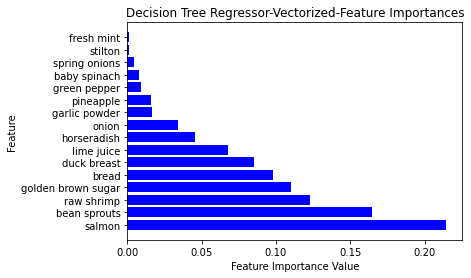

In [76]:
# x-coordinates of left sides of bars 
left = first_tuple_elements
  
# heights of bars
height = second_tuple_elements
  
# labels for bars
tick_label = second_tuple_elements
  
# plotting a bar chart
plt.barh(height, left, tick_label = tick_label, color = ['blue'])
  
# naming the x-axis
plt.xlabel('Feature Importance Value')
# naming the y-axis
plt.ylabel('Feature')
# plot title
plt.title('Decision Tree Regressor-Vectorized-Feature Importances')
  
# function to show the plot
plt.show()

The top three ingredients for feature importances are raw shrimp, bean sprouts and salmon.  This makes sense since these are likely uncommon and more expensive than basic ingredients, like salt and pepper.

In [77]:
pred = tree_reg.predict(X_test_vectorized)

#### Decision Tree Regressor-TFIDF Data

In [78]:
#Instantiate and fit a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train_tfidf, y_train)

DecisionTreeRegressor(max_depth=5)

In [79]:
print_metrics(X_train_tfidf, X_test_tfidf, y_train, y_test, tree_reg)

Train Mean Squared Error: 26630.807226110574
Test Mean Squared Error: 63130.93332916383

Train Root Mean Squared Error: 163.18948258423572
Test Root Mean Squared Error: 251.25869801693202

Train Mean Absolute Error: 123.64689622887579
Test Mean Absolute Error: 153.16371023363777


Same result as the vectorized data, the test data errors improved significantly compared to the linear regression model.  However, the training data error increased indicating underfitting.

In [80]:
importances = list(zip(tree_reg.feature_importances_, df_tfidfvect.columns))
importances.sort(reverse=True)

In [81]:
importanceswvalue=importances[:16]
importanceswvalue

[(0.2137282825355481, 'salmon'),
 (0.21047820839173076, 'bean sprouts'),
 (0.11213715830525882, 'raw shrimp'),
 (0.09758686543559504, 'bread'),
 (0.08458470113725905, 'duck breast'),
 (0.06616680027706588, 'lime juice'),
 (0.06417704171717706, 'rice vermicelli'),
 (0.044544821153681136, 'horseradish'),
 (0.03557100510134872, 'onion'),
 (0.02771338310303727, 'garlic'),
 (0.012564418287773108, 'pineapple'),
 (0.011892951836747497, 'okara'),
 (0.010232712559155406, 'ground black pepper'),
 (0.0037564788653482533, 'lettuce leaf'),
 (0.0029936477877491705, 'spring onions'),
 (0.00112653922748413, 'salt and pepper')]

In [82]:
first_tuple_elements = []
for a_tuple in importanceswvalue:
    first_tuple_elements.append(a_tuple[0])
                                
print(first_tuple_elements)
    

[0.2137282825355481, 0.21047820839173076, 0.11213715830525882, 0.09758686543559504, 0.08458470113725905, 0.06616680027706588, 0.06417704171717706, 0.044544821153681136, 0.03557100510134872, 0.02771338310303727, 0.012564418287773108, 0.011892951836747497, 0.010232712559155406, 0.0037564788653482533, 0.0029936477877491705, 0.00112653922748413]


In [83]:
second_tuple_elements = []
for a_tuple in importanceswvalue:
    second_tuple_elements.append(a_tuple[1])
                                
print(second_tuple_elements)

['salmon', 'bean sprouts', 'raw shrimp', 'bread', 'duck breast', 'lime juice', 'rice vermicelli', 'horseradish', 'onion', 'garlic', 'pineapple', 'okara', 'ground black pepper', 'lettuce leaf', 'spring onions', 'salt and pepper']


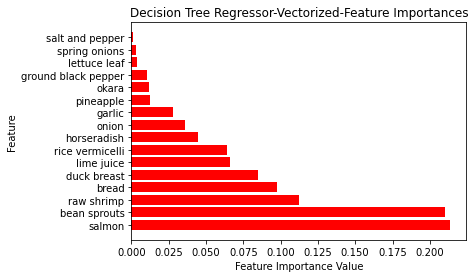

In [84]:
# x-coordinates of left sides of bars 
left = first_tuple_elements
  
# heights of bars
height = second_tuple_elements
  
# labels for bars
tick_label = second_tuple_elements
  
# plotting a bar chart
plt.barh(height, left, tick_label = tick_label, color = ['red'])
  
# naming the x-axis
plt.xlabel('Feature Importance Value')
# naming the y-axis
plt.ylabel('Feature')
# plot title
plt.title('Decision Tree Regressor-Vectorized-Feature Importances')
  
# function to show the plot
plt.show()

### Random forest

####  Random Forest Regressor-Vectorized Data

In [85]:
forest = RandomForestRegressor(n_estimators=100, max_depth= 5)
forest.fit(X_train_vectorized, y_train)

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=5)

In [86]:
print_metrics(X_train_vectorized, X_test_vectorized, y_train, y_test, forest)

Train Mean Squared Error: 25969.291113706393
Test Mean Squared Error: 49429.91484658056

Train Root Mean Squared Error: 161.14990261773787
Test Root Mean Squared Error: 222.32839415283996

Train Mean Absolute Error: 127.0050943154575
Test Mean Absolute Error: 141.26534025701037


A slight increase across the board, except for except for the Train Mean Absolute Error.  This is progress!

In [87]:
rfimportances = list(zip(forest.feature_importances_, df_tfidfvect.columns))
rfimportances.sort(reverse=True)
rfimportances

[(0.16792078876217947, 'salmon'),
 (0.09801584867862573, 'bean sprouts'),
 (0.07673691387360783, 'raw shrimp'),
 (0.06332468644941099, 'horseradish'),
 (0.049539792126365334, 'bread'),
 (0.0413648874270398, 'duck breast'),
 (0.038960993886488306, 'lime juice'),
 (0.034990047204300496, 'flank steak'),
 (0.028867714819084577, 'beef chuck roast'),
 (0.02260780679229511, 'orange juice'),
 (0.01850777969211227, 'escargot'),
 (0.017320924828708804, 'beer'),
 (0.017208386179654762, 'pineapple'),
 (0.01613121529811643, 'white fish fillets'),
 (0.014483911934639328, 'catfish'),
 (0.013988404248523167, 'lime peel'),
 (0.013194949479514339, 'salmon fillets'),
 (0.012682489453135399, 'onion'),
 (0.01261787876374621, 'elk tenderloin'),
 (0.01110325882227637, 'beef strip loin'),
 (0.010361482988134602, 'grilling cheese'),
 (0.009609165937068226, 'red pepper'),
 (0.00910496086059017, 'coleslaw dressing'),
 (0.008833145705746679, 'lump crabmeat'),
 (0.008663713182951196, 'prepared polenta'),
 (0.00779

In [88]:
rfimportanceswvalue=importances[:14]
rfimportanceswvalue

[(0.2137282825355481, 'salmon'),
 (0.21047820839173076, 'bean sprouts'),
 (0.11213715830525882, 'raw shrimp'),
 (0.09758686543559504, 'bread'),
 (0.08458470113725905, 'duck breast'),
 (0.06616680027706588, 'lime juice'),
 (0.06417704171717706, 'rice vermicelli'),
 (0.044544821153681136, 'horseradish'),
 (0.03557100510134872, 'onion'),
 (0.02771338310303727, 'garlic'),
 (0.012564418287773108, 'pineapple'),
 (0.011892951836747497, 'okara'),
 (0.010232712559155406, 'ground black pepper'),
 (0.0037564788653482533, 'lettuce leaf')]

In [89]:
first_rftuple_elements = []
for a_tuple in rfimportanceswvalue:
    first_rftuple_elements.append(a_tuple[0])
                                
print(first_rftuple_elements)

[0.2137282825355481, 0.21047820839173076, 0.11213715830525882, 0.09758686543559504, 0.08458470113725905, 0.06616680027706588, 0.06417704171717706, 0.044544821153681136, 0.03557100510134872, 0.02771338310303727, 0.012564418287773108, 0.011892951836747497, 0.010232712559155406, 0.0037564788653482533]


In [90]:
second_rftuple_elements = []
for a_tuple in rfimportanceswvalue:
    second_rftuple_elements.append(a_tuple[1])
                                
print(second_rftuple_elements)

['salmon', 'bean sprouts', 'raw shrimp', 'bread', 'duck breast', 'lime juice', 'rice vermicelli', 'horseradish', 'onion', 'garlic', 'pineapple', 'okara', 'ground black pepper', 'lettuce leaf']


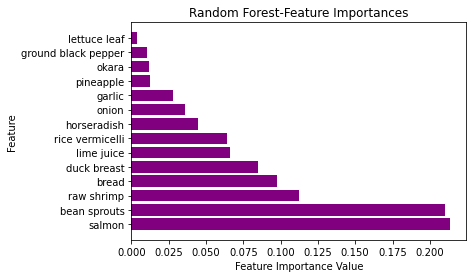

In [91]:
# x-coordinates of left sides of bars 
left = first_rftuple_elements
  
# heights of bars
height = second_rftuple_elements
  
# labels for bars
tick_label = second_rftuple_elements
  
# plotting a bar chart
plt.barh(height, left, tick_label = tick_label, color = ['purple'])
  
# naming the x-axis
plt.xlabel('Feature Importance Value')
# naming the y-axis
plt.ylabel('Feature')
# plot title
plt.title('Random Forest-Feature Importances')
  
# function to show the plot
plt.show()

####  Random Forest Regressor-TFIDF Data

In [92]:
forest = RandomForestRegressor(n_estimators=100, max_depth= 5)
forest.fit(X_train_tfidf, y_train)

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=5)

In [93]:
print_metrics(X_train_tfidf, X_test_tfidf, y_train, y_test, forest)

Train Mean Squared Error: 25517.9464055529
Test Mean Squared Error: 49963.23388531909

Train Root Mean Squared Error: 159.74337671888904
Test Root Mean Squared Error: 223.52457109973187

Train Mean Absolute Error: 125.82473111125196
Test Mean Absolute Error: 140.46365334763988


Same as with vectorized data, a slight increase across the board, except for except for the Train Mean Absolute Error.  This is progress!

In [94]:
rfimportances = list(zip(forest.feature_importances_, df_tfidfvect.columns))
rfimportances.sort(reverse=True)
rfimportances

[(0.15834071583657588, 'salmon'),
 (0.12238876670193656, 'bean sprouts'),
 (0.06271232711912239, 'raw shrimp'),
 (0.05543023104927289, 'water'),
 (0.04192317065749869, 'lime juice'),
 (0.03769666826607458, 'bread'),
 (0.03491882937131158, 'coleslaw dressing'),
 (0.03359708410659471, 'orange juice'),
 (0.03234416552793831, 'horseradish'),
 (0.03018257422746192, 'lime peel'),
 (0.029971501060484226, 'duck breast'),
 (0.016027223586296702, 'bok choy'),
 (0.01563764920833873, 'lime'),
 (0.01503237021957237, 'salt'),
 (0.014601426024297925, 'beef chuck roast'),
 (0.012622160850568602, 'flank steak'),
 (0.012512944593995197, 'white fish fillets'),
 (0.010906625615460887, 'escargot'),
 (0.010182597912602755, 'onion'),
 (0.010008270241825679, 'dried parsley'),
 (0.009885111393231031, 'garlic'),
 (0.008198525534785894, 'cornmeal'),
 (0.007733421038882048, 'beer'),
 (0.007679882246186081, 'elk tenderloin'),
 (0.007102521865984377, 'grilling cheese'),
 (0.006489826394367229, 'greek olives'),
 (0.

In [95]:
rfimportanceswvalue=importances[:14]
rfimportanceswvalue

[(0.2137282825355481, 'salmon'),
 (0.21047820839173076, 'bean sprouts'),
 (0.11213715830525882, 'raw shrimp'),
 (0.09758686543559504, 'bread'),
 (0.08458470113725905, 'duck breast'),
 (0.06616680027706588, 'lime juice'),
 (0.06417704171717706, 'rice vermicelli'),
 (0.044544821153681136, 'horseradish'),
 (0.03557100510134872, 'onion'),
 (0.02771338310303727, 'garlic'),
 (0.012564418287773108, 'pineapple'),
 (0.011892951836747497, 'okara'),
 (0.010232712559155406, 'ground black pepper'),
 (0.0037564788653482533, 'lettuce leaf')]

In [96]:
first_rftuple_elements = []
for a_tuple in rfimportanceswvalue:
    first_rftuple_elements.append(a_tuple[0])
                                
print(first_rftuple_elements)

[0.2137282825355481, 0.21047820839173076, 0.11213715830525882, 0.09758686543559504, 0.08458470113725905, 0.06616680027706588, 0.06417704171717706, 0.044544821153681136, 0.03557100510134872, 0.02771338310303727, 0.012564418287773108, 0.011892951836747497, 0.010232712559155406, 0.0037564788653482533]


In [97]:
second_rftuple_elements = []
for a_tuple in rfimportanceswvalue:
    second_rftuple_elements.append(a_tuple[1])
                                
print(second_rftuple_elements)

['salmon', 'bean sprouts', 'raw shrimp', 'bread', 'duck breast', 'lime juice', 'rice vermicelli', 'horseradish', 'onion', 'garlic', 'pineapple', 'okara', 'ground black pepper', 'lettuce leaf']


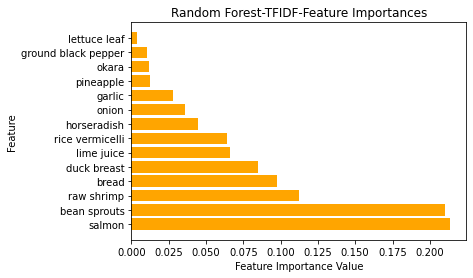

In [98]:
# x-coordinates of left sides of bars 
left = first_rftuple_elements
  
# heights of bars
height = second_rftuple_elements
  
# labels for bars
tick_label = second_rftuple_elements
  
# plotting a bar chart
plt.barh(height, left, tick_label = tick_label, color = ['orange'])
  
# naming the x-axis
plt.xlabel('Feature Importance Value')
# naming the y-axis
plt.ylabel('Feature')
# plot title
plt.title('Random Forest-TFIDF-Feature Importances')
  
# function to show the plot
plt.show()

####  Random Forest_2 Regressor-Vectorized Data

In [99]:
forest_2 = RandomForestRegressor(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train_vectorized, y_train)

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=2, max_features=10, n_estimators=5)

In [100]:
print_metrics(X_train_vectorized, X_test_vectorized, y_train, y_test, forest_2)

Train Mean Squared Error: 36575.80175626526
Test Mean Squared Error: 49119.66408058363

Train Root Mean Squared Error: 191.2480111171493
Test Root Mean Squared Error: 221.62956499660336

Train Mean Absolute Error: 144.73888756287204
Test Mean Absolute Error: 143.93253410548616


In [101]:
# First tree from forest_2
rf2_tree_1 = forest_2.estimators_[0]

In [102]:
rf2_1importances = list(zip(rf2_tree_1.feature_importances_, df_tfidfvect.columns))
rf2_1importances.sort(reverse=True)
rf2_1importanceswvalue=rf2_1importances[:2]
rf2_1importanceswvalue

[(0.9208544550297614, 'greek olives'),
 (0.07914554497023854, 'canned chipotle chile')]

In [103]:
first_rf2_1_tuple_elements = []
for a_tuple in rf2_1importanceswvalue:
    first_rf2_1_tuple_elements.append(a_tuple[0])
                                
print(first_rf2_1_tuple_elements)

[0.9208544550297614, 0.07914554497023854]


In [104]:
second_rf2_1_tuple_elements = []
for a_tuple in rf2_1importanceswvalue:
    second_rf2_1_tuple_elements.append(a_tuple[1])
                                
print(second_rf2_1_tuple_elements)

['greek olives', 'canned chipotle chile']


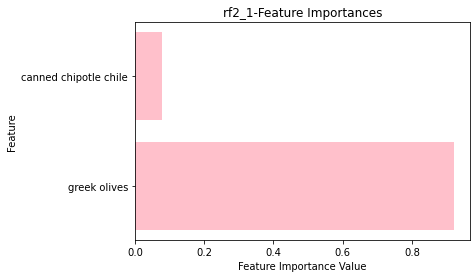

In [105]:
# x-coordinates of left sides of bars 
left = first_rf2_1_tuple_elements
  
# heights of bars
height = second_rf2_1_tuple_elements
  
# labels for bars
tick_label = second_rf2_1_tuple_elements
  
# plotting a bar chart
plt.barh(height, left, tick_label = tick_label, color = ['pink'])
  
# naming the x-axis
plt.xlabel('Feature Importance Value')
# naming the y-axis
plt.ylabel('Feature')
# plot title
plt.title('rf2_1-Feature Importances')
  
# function to show the plot
plt.show()

When looking at the tree for random forest #2, we see some very different ingredients listed as compared to the first random forest.  Canned chipotle chile and greek olives take the stage.  Again, this makes sense as these ingredients are unique compared to common ingredients such as olive oil.

In [106]:
rf_tree_2 = forest_2.estimators_[1]

In [107]:
rf2_2importances = list(zip(rf_tree_2.feature_importances_, df_tfidfvect.columns))
rf2_2importances.sort(reverse=True)
rf2_2importanceswvalue=rf2_1importances[:2]
rf2_2importanceswvalue

[(0.9208544550297614, 'greek olives'),
 (0.07914554497023854, 'canned chipotle chile')]

In [108]:
first_rf2_2_tuple_elements = []
for a_tuple in rf2_2importanceswvalue:
    first_rf2_2_tuple_elements.append(a_tuple[0])
                                
print(first_rf2_2_tuple_elements)

[0.9208544550297614, 0.07914554497023854]


In [109]:
second_rf2_2_tuple_elements = []
for a_tuple in rf2_2importanceswvalue:
    second_rf2_2_tuple_elements.append(a_tuple[1])
                                
print(second_rf2_2_tuple_elements)

['greek olives', 'canned chipotle chile']


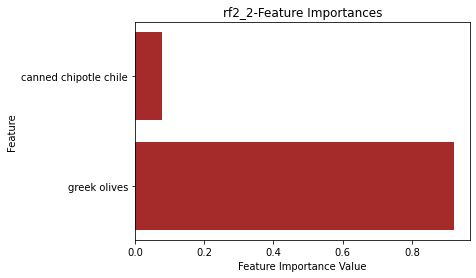

In [110]:
# x-coordinates of left sides of bars 
left = first_rf2_2_tuple_elements
  
# heights of bars
height = second_rf2_2_tuple_elements
  
# labels for bars
tick_label = second_rf2_2_tuple_elements
  
# plotting a bar chart
plt.barh(height, left, tick_label = tick_label, color = ['brown'])
  
# naming the x-axis
plt.xlabel('Feature Importance Value')
# naming the y-axis
plt.ylabel('Feature')
# plot title
plt.title('rf2_2-Feature Importances')
  
# function to show the plot
plt.show()

####  Random Forest_2 Regressor-TFIDF Data

In [111]:
forest_2 = RandomForestRegressor(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(X_train_tfidf, y_train)

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=2, max_features=10, n_estimators=5)

In [112]:
print_metrics(X_train_tfidf, X_test_tfidf, y_train, y_test, forest_2)

Train Mean Squared Error: 36268.806293357375
Test Mean Squared Error: 49945.06621663403

Train Root Mean Squared Error: 190.4437089886599
Test Root Mean Squared Error: 223.483928318423

Train Mean Absolute Error: 145.3500480816001
Test Mean Absolute Error: 146.2933960533015


In [113]:
# First tree from forest_2
rf2_tree_1 = forest_2.estimators_[0]

In [114]:
rf2_1importances = list(zip(rf2_tree_1.feature_importances_, df_tfidfvect.columns))
rf2_1importances.sort(reverse=True)
rf2_1importanceswvalue=rf2_1importances[:2]
rf2_1importanceswvalue

[(0.7997778711485583, 'broth'), (0.20022212885144178, 'lime juice')]

In [115]:
first_rf2_1_tuple_elements = []
for a_tuple in rf2_1importanceswvalue:
    first_rf2_1_tuple_elements.append(a_tuple[0])
                                
print(first_rf2_1_tuple_elements)

[0.7997778711485583, 0.20022212885144178]


In [116]:
second_rf2_1_tuple_elements = []
for a_tuple in rf2_1importanceswvalue:
    second_rf2_1_tuple_elements.append(a_tuple[1])
                                
print(second_rf2_1_tuple_elements)

['broth', 'lime juice']


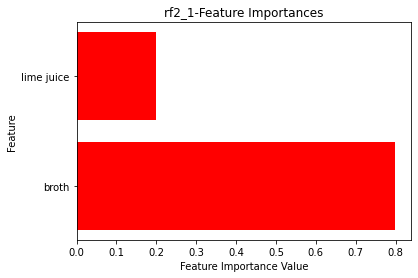

In [117]:
# x-coordinates of left sides of bars 
left = first_rf2_1_tuple_elements
  
# heights of bars
height = second_rf2_1_tuple_elements
  
# labels for bars
tick_label = second_rf2_1_tuple_elements
  
# plotting a bar chart
plt.barh(height, left, tick_label = tick_label, color = ['red'])
  
# naming the x-axis
plt.xlabel('Feature Importance Value')
# naming the y-axis
plt.ylabel('Feature')
# plot title
plt.title('rf2_1-Feature Importances')
  
# function to show the plot
plt.show()

Look at the first tree from forest_2, we see brand new features come to light, lime juice and broth.  Again, not typical, everyday ingredients.

In [118]:
rf_tree_2 = forest_2.estimators_[1]

In [119]:
rf2_2importances = list(zip(rf_tree_2.feature_importances_, df_tfidfvect.columns))
rf2_2importances.sort(reverse=True)
rf2_2importanceswvalue=rf2_1importances[:2]
rf2_2importanceswvalue

[(0.7997778711485583, 'broth'), (0.20022212885144178, 'lime juice')]

In [120]:
first_rf2_2_tuple_elements = []
for a_tuple in rf2_2importanceswvalue:
    first_rf2_2_tuple_elements.append(a_tuple[0])
                                
print(first_rf2_2_tuple_elements)

[0.7997778711485583, 0.20022212885144178]


In [121]:
second_rf2_2_tuple_elements = []
for a_tuple in rf2_2importanceswvalue:
    second_rf2_2_tuple_elements.append(a_tuple[1])
                                
print(second_rf2_2_tuple_elements)

['broth', 'lime juice']


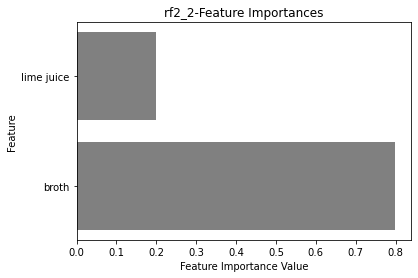

In [122]:
# x-coordinates of left sides of bars 
left = first_rf2_2_tuple_elements
  
# heights of bars
height = second_rf2_2_tuple_elements
  
# labels for bars
tick_label = second_rf2_2_tuple_elements
  
# plotting a bar chart
plt.barh(height, left, tick_label = tick_label, color = ['gray'])
  
# naming the x-axis
plt.xlabel('Feature Importance Value')
# naming the y-axis
plt.ylabel('Feature')
# plot title
plt.title('rf2_2-Feature Importances')
  
# function to show the plot
plt.show()

### Support Vector Regression Model

In [123]:
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import svm
from sklearn.svm import SVR

from surprise import Reader, Dataset
from surprise.prediction_algorithms import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.model_selection import train_test_split as tts
from surprise.dataset import DatasetAutoFolds
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection import GridSearchCV

#### SVR on Vectorized Data

In [124]:
svr = SVR(kernel='linear')
svr.fit(X_train_vectorized, y_train)

C:\Users\owner\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [125]:
svr.coef_

array([[ 1.00000000e+00,  1.00000000e+00,  5.00000000e+00,
         0.00000000e+00,  3.40379340e-01, -4.00000000e+00,
         1.00000000e+00, -3.16953767e-01,  0.00000000e+00,
        -3.00000000e+00, -2.00000000e+00, -2.00000000e+00,
        -1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
         1.00000000e+00, -2.00000000e+00,  2.00000000e+00,
        -1.00000000e+00,  1.00000000e+00,  2.80716172e+00,
        -3.00000000e+00,  2.41577687e+00,  1.00000000e+00,
        -8.26977086e-01, -1.00000000e+00,  1.63547410e+00,
         6.68278538e-01,  2.00000000e+00,  2.00000000e+00,
         2.00000000e+00,  7.79488018e+00,  2.00000000e+00,
        -5.84223133e-01,  0.00000000e+00,  3.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.00000000e+00,
         4.00000000e+00,  1.24459719e+01,  0.00000000e+00,
         2.00000000e+00,  2.00000000e+00,  9.91728024e-01,
        -1.00000000e+00,  3.00000000e+00, -6.00000000e+00,
        -1.00000000e+00,  0.00000000e+00,  6.00000000e+0

In [126]:
SupportVectorRegModel = SVR()
SupportVectorRegModel.fit(X_train_vectorized, y_train)

C:\Users\owner\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [127]:
print_metrics(X_train_vectorized, X_test_vectorized, y_train, y_test, svr)

Train Mean Squared Error: 34294.813928379066
Test Mean Squared Error: 49015.95869691793

Train Root Mean Squared Error: 185.1885901679125
Test Root Mean Squared Error: 221.3954802992101

Train Mean Absolute Error: 126.97155253913127
Test Mean Absolute Error: 136.5718302647395


Although there are some improvements compared to the previous models, they are very small and some metrics had an increased error.  

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
gsc = GridSearchCV(
        estimator=SVR(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [129]:
grid_result = gsc.fit(X_train_vectorized, y_train)
best_params = grid_result.best_params_
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

C:\Users\owner\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [130]:
best_svr

SVR(C=1000, coef0=0.1, epsilon=10, gamma=0.005)

In [131]:
best_svr = SVR(kernel='rbf', C=1000, epsilon=10, gamma=0.005,
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

In [132]:
best_svr.fit(X_train_vectorized,y_train)

C:\Users\owner\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=1000, coef0=0.1, epsilon=10, gamma=0.005)

In [133]:
print_metrics(X_train_vectorized, X_test_vectorized, y_train, y_test, best_svr)

Train Mean Squared Error: 22162.62911075373
Test Mean Squared Error: 43279.80708690898

Train Root Mean Squared Error: 148.8711829426828
Test Root Mean Squared Error: 208.0379943349507

Train Mean Absolute Error: 83.2182667077622
Test Mean Absolute Error: 123.10789661572467


Much better results.  For vectorized data, we are seeing the lowest errors for most metrics. 

#### SVR on TFIDF Data

In [134]:
svr = SVR(kernel='linear')
svr.fit(X_train_tfidf, y_train)

C:\Users\owner\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [135]:
print_metrics(X_train_tfidf, X_test_tfidf, y_train, y_test, svr)

Train Mean Squared Error: 39231.71121299267
Test Mean Squared Error: 52285.45761669945

Train Root Mean Squared Error: 198.06996544906212
Test Root Mean Squared Error: 228.66013560894135

Train Mean Absolute Error: 141.4097770410511
Test Mean Absolute Error: 143.72467117488563


The RMSE on the SVR model(<1) with default params is much better than on the linear regression model(6350386954581.906).  I will now tune the SVR model with gridsearch to identify optimal parameters.

In [136]:
grid_result = gsc.fit(X_train_tfidf, y_train)
best_params = grid_result.best_params_
best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

C:\Users\owner\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [137]:
best_svr

SVR(C=1000, coef0=0.1, epsilon=10, gamma=0.1)

In [138]:
best_svr = SVR(kernel='rbf', C=1000, epsilon=10, gamma=0.1,
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

In [139]:
best_svr.fit(X_train_tfidf,y_train)

C:\Users\owner\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(C=1000, coef0=0.1, epsilon=10, gamma=0.1)

In [140]:
print_metrics(X_train_tfidf, X_test_tfidf, y_train, y_test, best_svr)

Train Mean Squared Error: 14669.97355339212
Test Mean Squared Error: 44087.75580756821

Train Root Mean Squared Error: 121.11966625363578
Test Root Mean Squared Error: 209.9708451370528

Train Mean Absolute Error: 56.66881663709617
Test Mean Absolute Error: 126.33040666344591


Overall, our best performing model.  On average, the model's predictions for pricePerServing is about 210cents ($2.10) off on a scale of 13.23-2149.55 ($0.13-$21.50)

In [141]:
yfit2= best_svr.predict(X_test_tfidf)
yfit2

array([213.65358608, 374.90461034, 262.81224294, 486.8685498 ,
       125.79922479, 339.29798674, 191.77808367, 233.86708741,
       137.26828885, 330.96224107, 238.62302577, 148.41470416,
       309.7432403 , 209.55056606, 393.82495509, 232.33555317,
       244.13600726, 134.1989267 , 234.49902712, 263.03619563,
       340.28871929, 283.46010508, 270.35825766, 350.73575863,
       414.86856755, 308.21765613, 157.91431635, 181.41579065,
       148.6099676 , 366.47058133, 380.10820794, 362.19934778,
        47.22425863, 351.82260559, 221.51941633, 261.36513782,
       300.50880871, 268.08010724, 358.91358681, 297.69919848,
       354.49087699, 402.73431134, 339.19720914, 293.3680051 ,
       238.25217843, 131.76724516,  98.34434828, 250.71147866,
       195.36425867, 275.15346953, 245.17953141, 291.76683916,
       168.14189888, 248.11322783, 131.10249563,  72.81611144,
        97.68578104, 274.08824848, 230.02020529, 351.4591997 ,
       281.15765864, 307.4217695 , 241.94348575, 425.17

Given that the R-squared value is a bit higher and MSE is a bit lower for the SVR with Grid Search model, I will use this model to create the pricePerServing predictor.

## Post Modeling EDA and pricePerServing Function
I will now create a graphic to compare actual pricePerServing to the estimated pricePerServing per user.


In [142]:
X_test

,ingredname
521,"arugula,chickpeas,extra virgin olive oil,farfa..."
737,"cream cheese,salsa verde,fresh cilantro,cumin,..."
740,"marinated artichokes,brown rice flour,red pepp..."
660,"balsamic vinegar,bell pepper,golden brown suga..."
411,"peach,quick cooking oats,fat free milk,reduced..."
...,...
506,"fresh cilantro,extra virgin olive oil,parsley,..."
342,"mussels,onion,white wine,creme fraiche,curry p..."
485,"canned white beans,carrot,french bread,fresh r..."
711,"bell pepper,cabbage,carrot,boneless chicken br..."


In [143]:
y_test

,pricePerServing
521,383.98
737,294.11
740,432.00
660,785.34
411,91.67
...,...
506,382.58
342,574.06
485,386.21
711,245.22


In [144]:
y_test['preds'] = yfit2
y_test['preds']

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


521    213.653586
737    374.904610
740    262.812243
660    486.868550
411    125.799225
          ...    
506    344.995500
342    203.929891
485    227.296090
711    277.329304
133    230.655994
Name: preds, Length: 330, dtype: float64

In [145]:
df_out = pd.merge(data,y_test[['preds']],how = 'left',left_index = True, right_index = True)
df_out

,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,usedIngredients,unusedIngredients,aggregateLikes,spoonacularScore,healthScore,extendedIngredients,pricePerServing,ingredname,preds
0,716426,"Cauliflower, Brown Rice, and Vegetable Fried Rice",8,http://fullbellysisters.blogspot.com/2012/01/c...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/cauliflower-brown-rice...,0,9,"[{'id': 11090, 'amount': 2.0, 'unit': 'cups', ...",[],[],3689,99.0,76.0,"[{'id': 11090, 'aisle': 'Produce', 'image': 'b...",112.39,"broccoli,cauliflower,coconut oil,cooked brown ...",NaN
1,715594,Homemade Garlic and Basil French Fries,2,http://www.pinkwhen.com/homemade-french-fries/,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['dairy free', 'lacto ovo vegetarian', 'vegan']",https://spoonacular.com/homemade-garlic-and-ba...,0,2,"[{'id': 2044, 'amount': 0.25, 'unit': 'cup', '...",[],[],1669,99.0,78.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",83.23,"basil,wheat flour,garlic powder,garlic salt,ve...",NaN
2,715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,"[{'id': 9040, 'amount': 0.25, 'unit': 'cup', '...",[],[],689,99.0,63.0,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...",204.29,"banana,graham cracker crumbs,soymilk,strawberr...",159.786102
3,644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,"[{'id': 2069, 'amount': 3.0, 'unit': 'tablespo...",[],[],19,99.0,93.0,"[{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...",69.09,"balsamic vinegar,garlic,kale,olive oil",217.650355
4,715392,Chicken Tortilla Soup (Slow Cooker),2,http://www.pinkwhen.com/chicken-tortilla-soup-...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free']",https://spoonacular.com/chicken-tortilla-soup-...,0,9,"[{'id': 16018, 'amount': 15.0, 'unit': 'oz', '...",[],[],1429,99.0,73.0,"[{'id': 16018, 'aisle': 'Canned and Jarred', '...",339.33,"canned black beans,canned green chiles,canned ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,660322,Smashed Fried Lemon Potatoes,4,http://www.foodista.com/recipe/38DN2VQF/smashe...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/smashed-fried-lemon-po...,0,8,"[{'id': 10111352, 'amount': 1.5, 'unit': 'poun...",[],[],6,76.0,24.0,"[{'id': 10111352, 'aisle': 'Frozen', 'image': ...",111.22,"fingerling potato,parsley,fresh rosemary,thyme...",262.736249
996,157081,Omega-3 Creamy Leek Soup,2,http://spoonacular.com/-1381436006147,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'primal', 'pescatarian']",https://spoonacular.com/omega-3-creamy-leek-so...,0,8,"[{'id': 1053, 'amount': 250.0, 'unit': 'ml', '...",[],[],0,76.0,46.0,"[{'id': 1053, 'aisle': 'Milk, Eggs, Other Dair...",595.06,"cream,dill,lemon juice,leek,green peas,salmon,...",NaN
997,661351,Spinach Soup With Wontons,4,http://www.foodista.com/recipe/VPKSZHYP/spinac...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],[],https://spoonacular.com/spinach-soup-with-wont...,0,8,"[{'id': 2044, 'amount': 1.0, 'unit': 'teaspoon...",[],[],1,76.0,36.0,"[{'id': 2044, 'aisle': 'Produce;Spices and Sea...",242.59,"basil,chicken broth,chili sauce,frozen spinach...",NaN
998,658529,"Roasted Butternut Squash, Pecan, Bacon, Mix Gr...",4,http://www.foodista.com/recipe/67XP25KK

In [146]:
df_out[df_out['preds'].isna()]
df_out.dropna(inplace=True)

In [147]:
df_out.tail()

,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,missedIngredients,usedIngredients,unusedIngredients,aggregateLikes,spoonacularScore,healthScore,extendedIngredients,pricePerServing,ingredname,preds
989,655055,Pea Soup With Smoked Pork Ribs,4,http://www.foodista.com/recipe/YY6L6W2K/pea-so...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/pea-soup-with-smoked-p...,0,7,"[{'id': 10123, 'amount': 4.0, 'unit': 'slices'...",[],[],1,76.0,36.0,"[{'id': 10123, 'aisle': 'Meat', 'image': 'raw-...",221.96,"bacon,bay leaves,peppercorns,caraway seeds,car...",296.682827
991,634888,Best Buffalo Chicken Chili,10,http://www.foodista.com/recipe/C53B32ZC/best-b...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free']",https://spoonacular.com/best-buffalo-chicken-c...,0,13,"[{'id': 16015, 'amount': 15.0, 'unit': 'oz', '...",[],[],3,76.0,36.0,"[{'id': 16015, 'aisle': 'Pasta and Rice;Canned...",263.59,"black beans,tomato sauce,carrot,celery,chili p...",250.685324
994,664083,Turkey-Stuffed Portabella Mushrooms,4,http://www.foodista.com/recipe/QDBNNPJR/turkey...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'primal']",https://spoonacular.com/turkey-stuffed-portabe...,0,8,"[{'id': 11955, 'amount': 1.0, 'unit': 'cup', '...",[],[],1,76.0,38.0,"[{'id': 11955, 'aisle': 'Canned and Jarred;Pro...",549.89,"sun dried tomatoes,garlic,ground black pepper,...",361.419308
995,660322,Smashed Fried Lemon Potatoes,4,http://www.foodista.com/recipe/38DN2VQF/smashe...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/smashed-fried-lemon-po...,0,8,"[{'id': 10111352, 'amount': 1.5, 'unit': 'poun...",[],[],6,76.0,24.0,"[{'id': 10111352, 'aisle': 'Frozen', 'image': ...",111.22,"fingerling potato,parsley,fresh rosemary,thyme...",262.736249
998,658529,"Roasted Butternut Squash, Pecan, Bacon, Mix Gr...",4,http://www.foodista.com/recipe/67XP25KK/roaste...,"{'nutrients': [{'name': 'Calories', 'title': '...",['salad'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/roasted-butternut-squa...,0,8,"[{'id': 10123, 'amount': 5.0, 'unit': 'slices'...",[],[],1,76.0,37.0,"[{'id': 10123, 'aisle': 'Meat', 'image': 'raw-...",363.42,"bacon,ground black pepper,butternut squash,sto...",236.866803


In [148]:
error = df_out['pricePerServing'] - df_out['preds']
error

2       44.503898
3     -148.560355
5       29.529415
7       31.133882
9       20.398824
          ...    
989    -74.722827
991     12.904676
994    188.470692
995   -151.516249
998    126.553197
Length: 330, dtype: float64

In [149]:
df_out=df_out.assign(error=error.values)
df_out

,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,...,usedIngredients,unusedIngredients,aggregateLikes,spoonacularScore,healthScore,extendedIngredients,pricePerServing,ingredname,preds,error
2,715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,...,[],[],689,99.0,63.0,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...",204.29,"banana,graham cracker crumbs,soymilk,strawberr...",159.786102,44.503898
3,644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,...,[],[],19,99.0,93.0,"[{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...",69.09,"balsamic vinegar,garlic,kale,olive oil",217.650355,-148.560355
5,716268,African Chicken Peanut Stew,1,http://www.afrolems.com/2014/03/18/african-chi...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free']",https://spoonacular.com/african-chicken-peanut...,0,13,...,[],[],124,99.0,100.0,"[{'id': 10211821, 'aisle': 'Produce', 'image':...",355.78,"bell pepper,whole chicken,cooking oil,curry pa...",326.250585,29.529415
7,782601,Red Kidney Bean Jambalaya,6,http://foodandspice.blogspot.com/2016/05/red-k...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/red-kidney-bean-jambal...,0,17,...,[],[],53,99.0,100.0,"[{'id': 20040, 'aisle': 'Pasta and Rice', 'ima...",185.77,"brown rice,carrot,celery,celery seed,dried kid...",154.636118,31.133882
9,715446,Slow Cooker Beef Stew,6,http://www.pinkwhen.com/slow-cooker-beef-stew-...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free']",https://spoonacular.com/slow-cooker-beef-stew-...,0,9,...,[],[],57,99.0,100.0,"[{'id': 6008, 'aisle': 'Canned and Jarred', 'i...",293.64,"beef broth,carrot,celery,cream of mushroom sou...",273.241176,20.398824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,655055,Pea Soup With Smoked Pork Ribs,4,http://www.foodista.com/recipe/YY6L6W2K/pea-so...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/pea-soup-with-smoked-p...,0,7,...,[],[],1,76.0,36.0,"[{'id': 10123, 'aisle': 'Meat', 'image': 'raw-...",221.96,"bacon,bay leaves,peppercorns,caraway seeds,car...",296.682827,-74.722827
991,634888,Best Buffalo Chicken Chili,10,http://www.foodista.com/recipe/C53B32ZC/best-b...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free']",https://spoonacular.com/best-buffalo-chicken-c...,0,13,...,[],[],3,76.0,36.0,"[{'id': 16015, 'aisle': 'Pasta and Rice;Canned...",263.59,"black beans,tomato sauce,carrot,celery,chili p...",250.685324,12.904676
994,664083,Turkey-Stuffed Portabella Mushrooms,4,http://www.foodista.com/recipe/QDBNNPJR/turkey...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'primal']",https://spoonacular.com/turkey-stuffed-portabe...,0,8,...,[],[],1,76.0,38.0,"[{'id': 11955, 'aisle': 'Canned and Jarred;Pro...",549.89,"sun dried tomatoes,garlic,ground black pepper,...",361.419308,188.470692
995,660322,Smashed Fried Lemon Potatoes,4,http://www.foodista.com/recipe/38DN2VQF/smashe...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/smashed-

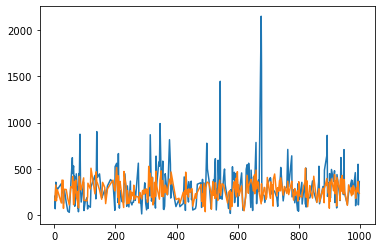

In [150]:
fig, ax = plt.subplots()
ax.plot(df_out['pricePerServing'])
ax.plot(df_out['preds'])

Text(0, 0.5, 'Frequency')

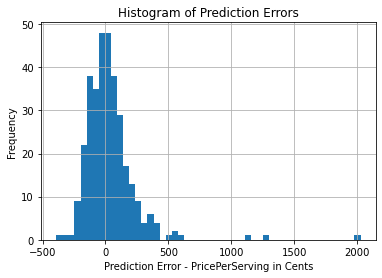

In [151]:
#create histogram of prediction errors for final model
diff=error
diff.hist(bins = 50)
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error - PricePerServing in Cents')
plt.ylabel('Frequency')

In [166]:
#Looking at the ingredients with the recipes that had the highest prediction error to see if anything stands out-checked all with errors greater than
df_out_error=df_out[error>200]
df_out_error

,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,...,usedIngredients,unusedIngredients,aggregateLikes,spoonacularScore,healthScore,extendedIngredients,pricePerServing,ingredname,preds,error
23,636589,Butternut Squash Frittata,1,http://www.foodista.com/recipe/XQXFKGHT/butter...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']",['gluten free'],https://spoonacular.com/butternut-squash-fritt...,0,5,...,[],[],18,97.0,100.0,"[{'id': 11485, 'aisle': 'Produce', 'image': 'b...",340.39,"butternut squash,goat cheese,egg substitute,fa...",131.102496,209.287504
59,639851,Cod with Tomato-Olive-Chorizo Sauce and Mashed...,2,http://www.foodista.com/recipe/GNSQNH5W/cod-wi...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free']",https://spoonacular.com/cod-with-tomato-olive-...,0,8,...,[],[],14,95.0,81.0,"[{'id': 1059195, 'aisle': 'Canned and Jarred',...",620.78,"black olives,cod,parsley,parsley,lemon juice,o...",297.699198,323.080802
63,716221,Split Pea and Mushroom Soup,1,http://foodandspice.blogspot.com/2009/10/split...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'primal']",https://spoonacular.com/split-pea-and-mushroom...,0,13,...,[],[],16,95.0,76.0,"[{'id': 2004, 'aisle': 'Produce;Spices and Sea...",531.80,"bay leaves,carrot,celery sticks,fresh tarragon...",112.979795,418.820205
72,664090,Turkish Chicken Salad with Home-made Cacik Yog...,4,http://www.foodista.com/recipe/XYFWSH25/a-turk...,"{'nutrients': [{'name': 'Calories', 'title': '...",['salad'],['gluten free'],https://spoonacular.com/turkish-chicken-salad-...,0,15,...,[],[],9,95.0,84.0,"[{'id': 11124, 'aisle': 'Produce', 'image': 's...",446.34,"carrot,cucumber,garlic,gherkins,jalapeno peppe...",200.301619,246.038381
84,639411,Cilantro Lime Halibut,2,http://www.foodista.com/recipe/W2C6K48J/cilant...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/cilantro-lime-halibut-...,0,6,...,[],[],19,94.0,67.0,"[{'id': 6172, 'aisle': 'Canned and Jarred', 'i...",874.74,"chicken stock,fresh cilantro,spring onions,hal...",359.006902,515.733098
139,660736,Soy Ginger Glazed Halibut with Ginger Peach Re...,2,http://www.foodista.com/recipe/2DVW5R35/soy-gi...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free', 'pescatarian']",https://spoonacular.com/soy-ginger-glazed-hali...,0,9,...,[],[],58,93.0,43.0,"[{'id': 2048, 'aisle': 'Oil, Vinegar, Salad Dr...",902.99,"apple cider vinegar,ginger,halibut steaks,jala...",362.199348,540.790652
199,1096213,"Creamy, Healthy Asparagus Soup with Avocado an...",4,https://www.foodista.com/recipe/G532D7M3/cream...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'soup', 'main course', 'main dish', ...","['gluten free', 'lacto ovo vegetarian', 'primal']",https://spoonacular.com/creamy-healthy-asparag...,0,8,...,[],[],1,92.0,100.0,"[{'id': 4053, 'aisle': 'Oil, Vinegar, Salad Dr...",524.29,"olive oil,leek,fennel bulb,coarse kosher salt,...",280.455758,243.834242
209,648247,Italian Seafood Stew,3,http://www.foodista.com/recipe/N5QMQ6DY/italia...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free', 'pescatarian']",https://spoonacular.com/italian-seafood-stew-6...,0,13,...,[],[],1,91.0,100.0,"[{'id': 11266, 'aisle': 'Produce', 'image': 'm...",657.64,"crimini mushrooms,bay leaves,canned tomatoes,s...",425.177261,232.462739
210,665831,"fennel, Peppers, Lettuce Salad",1,https://www.foodista.com/recipe/VNXX86Q3/fenne...,"{'nutrients': [{'name': 'Calories', 'title': '...","['side dish', 'lunch', 'main course', 'sal

In [164]:
#exploring the data that contains the highest prediction error with frequency distributions
ingreds_concat_error=[]
for ingreds in df_out_error['ingredname']:
    ingreds_concat_error +=ingreds.split(',')

In [167]:
#Viewing the ingredients that appear most often in the recipes with highest prediction error
ingreds_freqdist_error = FreqDist(ingreds_concat_error)
topfreqdisterror=ingreds_freqdist_error.most_common(42)
topfreqdisterror

[('garlic', 28),
 ('olive oil', 24),
 ('salt', 14),
 ('onion', 14),
 ('salt and pepper', 12),
 ('bell pepper', 11),
 ('parsley', 11),
 ('lemon juice', 10),
 ('ground black pepper', 10),
 ('red onion', 8),
 ('fresh cilantro', 8),
 ('ginger', 8),
 ('carrot', 7),
 ('jalapeno pepper', 7),
 ('red pepper flakes', 7),
 ('red pepper', 6),
 ('mushrooms', 6),
 ('spring onions', 6),
 ('lime juice', 6),
 ('white wine', 6),
 ('soy sauce', 6),
 ('shallot', 6),
 ('water', 5),
 ('chicken stock', 5),
 ('lemon', 5),
 ('canned tomatoes', 5),
 ('cumin', 5),
 ('oregano', 5),
 ('parmesan', 4),
 ('tomato', 4),
 ('coarse kosher salt', 4),
 ('butter', 4),
 ('ground cayenne pepper', 4),
 ('basil', 4),
 ('zucchini', 4),
 ('lemon peel', 4),
 ('bay leaves', 3),
 ('green peas', 3),
 ('sea salt', 3),
 ('iceberg lettuce', 3),
 ('halibut steaks', 3),
 ('apple cider vinegar', 3)]

For future work, it might be a good test to remove ingredients that appear in more than X% of recipes or remove ingredients with have very little monetary value.  

In [180]:
#Looking at the ingredients with the recipes that had the highest prediction error to see if anything stands out-checked all with errors greater than
df_out_error_min=df_out[error<50]
df_out_error_min

,id,title,servings,sourceUrl,nutrition,dishTypes,diets,spoonacularSourceUrl,usedIngredientCount,missedIngredientCount,...,usedIngredients,unusedIngredients,aggregateLikes,spoonacularScore,healthScore,extendedIngredients,pricePerServing,ingredname,preds,error
2,715497,Berry Banana Breakfast Smoothie,1,http://www.pinkwhen.com/berry-banana-breakfast...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']",['lacto ovo vegetarian'],https://spoonacular.com/berry-banana-breakfast...,0,5,...,[],[],689,99.0,63.0,"[{'id': 9040, 'aisle': 'Produce', 'image': 'ba...",204.29,"banana,graham cracker crumbs,soymilk,strawberr...",159.786102,44.503898
3,644387,Garlicky Kale,2,http://www.foodista.com/recipe/J2FTJBF7/garlic...,"{'nutrients': [{'name': 'Calories', 'title': '...",['side dish'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/garlicky-kale-644387,0,3,...,[],[],19,99.0,93.0,"[{'id': 2069, 'aisle': 'Oil, Vinegar, Salad Dr...",69.09,"balsamic vinegar,garlic,kale,olive oil",217.650355,-148.560355
5,716268,African Chicken Peanut Stew,1,http://www.afrolems.com/2014/03/18/african-chi...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free']",https://spoonacular.com/african-chicken-peanut...,0,13,...,[],[],124,99.0,100.0,"[{'id': 10211821, 'aisle': 'Produce', 'image':...",355.78,"bell pepper,whole chicken,cooking oil,curry pa...",326.250585,29.529415
7,782601,Red Kidney Bean Jambalaya,6,http://foodandspice.blogspot.com/2016/05/red-k...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free', 'lacto ovo veget...",https://spoonacular.com/red-kidney-bean-jambal...,0,17,...,[],[],53,99.0,100.0,"[{'id': 20040, 'aisle': 'Pasta and Rice', 'ima...",185.77,"brown rice,carrot,celery,celery seed,dried kid...",154.636118,31.133882
9,715446,Slow Cooker Beef Stew,6,http://www.pinkwhen.com/slow-cooker-beef-stew-...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free']",https://spoonacular.com/slow-cooker-beef-stew-...,0,9,...,[],[],57,99.0,100.0,"[{'id': 6008, 'aisle': 'Canned and Jarred', 'i...",293.64,"beef broth,carrot,celery,cream of mushroom sou...",273.241176,20.398824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,655847,Pesto Veggie Pizza,4,https://www.foodista.com/recipe/VZQSY22T/pesto...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']",[],https://spoonacular.com/pesto-veggie-pizza-655847,0,15,...,[],[],1,76.0,45.0,"[{'id': 18375, 'aisle': 'Baking', 'image': 'ye...",259.78,"yeast,water,honey,wheat flour,salt,garlic powd...",320.669282,-60.889282
986,647261,Honey Nut Raspberry Baked Oatmeal,3,https://www.foodista.com/recipe/F6QYB4D7/honey...,"{'nutrients': [{'name': 'Calories', 'title': '...","['morning meal', 'brunch', 'breakfast']","['gluten free', 'lacto ovo vegetarian']",https://spoonacular.com/honey-nut-raspberry-ba...,0,7,...,[],[],9,76.0,23.0,"[{'id': 8120, 'aisle': 'Cereal', 'image': 'rol...",102.37,"oats,honey,applesauce,fat free milk,raspberrie...",181.415791,-79.045791
989,655055,Pea Soup With Smoked Pork Ribs,4,http://www.foodista.com/recipe/YY6L6W2K/pea-so...,"{'nutrients': [{'name': 'Calories', 'title': '...",['soup'],"['gluten free', 'dairy free', 'paleolithic', '...",https://spoonacular.com/pea-soup-with-smoked-p...,0,7,...,[],[],1,76.0,36.0,"[{'id': 10123, 'aisle': 'Meat', 'image': 'raw-...",221.96,"bacon,bay leaves,peppercorns,caraway seeds,car...",296.682827,-74.722827
991,634888,Best Buffalo Chicken Chili,10,http://www.foodista.com/recipe/C53B32ZC/best-b...,"{'nutrients': [{'name': 'Calories', 'title': '...","['lunch', 'main course', 'main dish', 'dinner']","['gluten free', 'dairy free']",https://spoonacular.com/best-buffalo-chicken-c...,

In [183]:
#exploring the data that contains the lowest prediction error with frequency distributions
ingreds_concat_errormin=[]
for ingreds in df_out_error_min['ingredname']:
    ingreds_concat_errormin +=ingreds.split(',')

In [185]:
#Viewing the ingredients that appear most often in the recipes with lowest prediction error
ingreds_freqdist_errormin = FreqDist(ingreds_concat_errormin)
topfreqdisterrormin=ingreds_freqdist_errormin.most_common(42)
topfreqdisterrormin

[('garlic', 109),
 ('olive oil', 90),
 ('onion', 56),
 ('salt and pepper', 56),
 ('salt', 51),
 ('carrot', 40),
 ('parsley', 35),
 ('ground black pepper', 33),
 ('lemon juice', 33),
 ('water', 32),
 ('spring onions', 31),
 ('tomato', 27),
 ('bell pepper', 26),
 ('fresh cilantro', 22),
 ('parmesan', 20),
 ('red pepper', 19),
 ('wheat flour', 19),
 ('extra virgin olive oil', 19),
 ('basil', 19),
 ('sea salt', 18),
 ('red onion', 17),
 ('cumin', 17),
 ('bay leaves', 16),
 ('ginger', 15),
 ('red pepper flakes', 13),
 ('spinach', 13),
 ('kale', 12),
 ('sugar', 12),
 ('chili pepper', 12),
 ('canned tomatoes', 12),
 ('coarse kosher salt', 12),
 ('egg', 12),
 ('hass avocado', 11),
 ('lemon peel', 11),
 ('oregano', 11),
 ('lime juice', 11),
 ('balsamic vinegar', 10),
 ('cooking oil', 10),
 ('vegetable stock', 10),
 ('broccoli', 10),
 ('soy sauce', 10),
 ('mushrooms', 10)]